

# IMDb Data Analysis(1960-2015)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information of about 10,000 movies collected from The Movie Database (TMDb), including popularity, budget and revenue. It also includes two columns ending with “_adj” which show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

>**Variable Description**

The following are the variables in the database and thier description:
1. id: Movie ID number  
2. imdb_id: IMDb Movie ID Number 
3. popularity: represents how popular a movie is among the fans
4. budget: represents the budget of the movie 
5. revenue: represents the gross revenue of the movie 
6. original_title: represents the title of the movie 
7. cast: represents the actors in the movie
8. homepage: represents the website for the movie 
9. director: represents the director/s of the movie 
10. tagline: represents a quote synonymous with the movie  
11. keywords: represents words synonymous with the movie 
12. overview: represents the plot line of the movie 
13. runtime: represents the overall length of the movie in minutes  
14. genres: represnets the type of movie 
15. production_companies: represents the production company that produced the movie 
16. release_date: represents the date the movie was released 
17. vote_count: represents the count of votes the movie received 
18. vote_average: represents the voting average out of 10 the movie received
19. release_year: represents the year the movie was released          
20. budget_adj: represents the budget of the movie in terms of 2010 dollars, accounting for inflation over time
21. revenue_adj: represents the budget of the movie in terms of 2010 dollars, accounting for inflation over time   

>**Research Questions**
1. What are the highest grossing movies?

   a) Are the highest grossing movies popular? 
   
   b) What is the vote average for the highest grossing movies?
   
2. Are the most popular movies also the highest grossing movies? 

3. Does the average vote reflect the popularity of a movie? 

4. Which movies have the longest runtime? 

5. Using the budget to profit ratio are the most profitable movies also the highest grossing movies? 

6. Who are the Top 10 directors in terms of the following:

   a) popularity? 

   b) Vote average?
   
   c) number of movies directed?
   
7. Who are the Top 20 Actors of in terms of the movies they have featured in? 


>**Packages to be Used**

The packages to be used in this analysis are:
1. Pandas
2. Numpy
3. Seaborn
4. Matplotlib 


### References

https://www.kaggle.com/code/trentpark/data-analysis-basics-imdb-dataset/notebook

https://www.youtube.com/watch?v=i4cI4y9cLzg

https://www.youtube.com/watch?v=Asm2_qgBK48&t=161s

https://github.com/hima888/Investigate-a-Dataset-TMDB-Movie-Data-/blob/master/investigate-a-dataset-template.ipynb

https://github.com/AhmedS-Elmekawy/TMDb-Movie-Data-Analysis

https://www.kaggle.com/code/betizazualemu/tmdb-movies-analysis-ipynb


In [56]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

In this section, the data is loaded and checked for general properties.

### General Properties

In [57]:
#loading data

imdb_data = pd.read_csv('tmdb-movies.csv')

imdb_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,04/01/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [58]:
#checking for the general information of the dataset

imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

From the above we can deduce that the dataset has:

21 columns, 
10866 rows, 
11 string variables, 
6 integer variables & 4 float variables

In [59]:
#Checking for missing and duplicate values

imdb_data.isna().sum(), f"Duplicated rows:{imdb_data.duplicated().sum()}"

(id                         0
 imdb_id                   10
 popularity                 0
 budget                     0
 revenue                    0
 original_title             0
 cast                      76
 homepage                7930
 director                  44
 tagline                 2824
 keywords                1493
 overview                   4
 runtime                    0
 genres                    23
 production_companies    1030
 release_date               0
 vote_count                 0
 vote_average               0
 release_year               0
 budget_adj                 0
 revenue_adj                0
 dtype: int64,
 'Duplicated rows:1')

From the above result we have a combination of missing and duplicated values.

The missing values are as follows:

imdb_id = 10, 
cast = 76, 
homepage = 7930, 
director = 44, 
tagline = 2824, 
keywords = 1493, 
overview = 4, 
genres = 23
& production_companies = 1030

Duplicated rows = 1

In [60]:
#Dropping columns not needed for this analysis

imdb_data.drop(columns=['id','imdb_id','homepage', 'tagline', 'keywords', 'overview', 'budget_adj', 'revenue_adj'], inplace=True)
imdb_data.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year'],
      dtype='object')

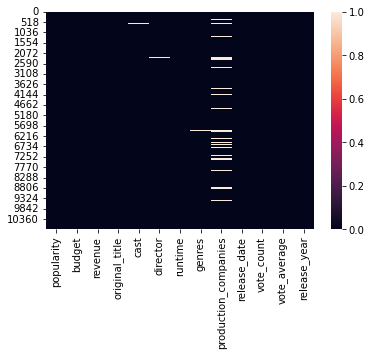

In [62]:
#the heatmap below shows the missing values in the remaining columns

sns.heatmap(imdb_data.isnull());

The highlighted areas represents the missing values in the dataset

In relation to the dropped columns, in particular keywords; keywords has the highest number of missing values as such dropping the null values will result in the loss of a large amount of data. The rest of the columns were not needed for this analysis.  

### Data Cleaning

in this section, we shall drop the missing and duplicate values for the remaining columns. We shall also check for zero values and rectify where possible so as to ensure that data is not lost during the cleaning process.

In [63]:
# Dropping Missing Values

imdb_data.dropna(axis=0, inplace=True)
imdb_data.shape

(9773, 13)

The number of row and columns before dropping the irrelevant columns and missing values were (10866, 21)

After dropping the columns and rows, 9773 rows and 14 columns remained.

In [64]:
# Checking for zero values
imdb_data.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,9773.000000,9.773000e+03,9.773000e+03,9773.000000,9773.000000,9773.000000,9773.000000
mean,0.694711,1.618108e+07,4.422678e+07,102.925509,239.298782,5.963430,2000.879362
std,1.036879,3.220939e+07,1.225834e+08,27.876224,602.982068,0.913179,13.036453
min,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,0.232756,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000
50%,0.419765,2.000000e+05,0.000000e+00,100.000000,46.000000,6.000000,2005.000000
75%,0.776380,1.940000e+07,3.104204e+07,112.000000,173.000000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000


From the results, the minimum values for the budget, reveune and runtime is 0, which is not supposed to be the case. Every movie has a runtime and budget. The revenue can be lower than the budget as a result of poor performance of a movie it cannot however be zero. 

Depending on the number of rows with zero values, we can either replace them with mean values to prevent a loss of massive data or drop them all together.

In [65]:
#Checking for zero values

for column_name in imdb_data.columns:
    column = imdb_data[column_name]
    
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)


Count of zeros in column  popularity  is :  0
Count of zeros in column  budget  is :  4751
Count of zeros in column  revenue  is :  5022
Count of zeros in column  original_title  is :  0
Count of zeros in column  cast  is :  0
Count of zeros in column  director  is :  0
Count of zeros in column  runtime  is :  13
Count of zeros in column  genres  is :  0
Count of zeros in column  production_companies  is :  0
Count of zeros in column  release_date  is :  0
Count of zeros in column  vote_count  is :  0
Count of zeros in column  vote_average  is :  0
Count of zeros in column  release_year  is :  0


As per the results:

1. Budget has 4751 zero values
2. Revenue has 5022 zero values
3. Runtime has 13 zero values

The number of zero values is significantly large. Dropping them all together will result in a massive loss of data. Therefore the zero values shall be replaced with yearly mean values. The remaining zero values will then be dropped.  

In [67]:
# Checking for rows without zeros
#code reference: https://www.kaggle.com/code/betizazualemu/tmdb-movies-analysis-ipynb

without_zeros = imdb_data[(imdb_data.budget != 0) & (imdb_data.revenue != 0) & (imdb_data.runtime != 0)]
without_zeros.shape

(3806, 13)

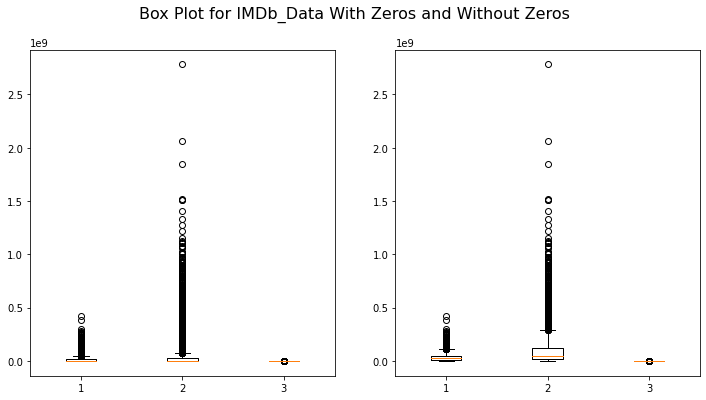

In [68]:
# Visuals showing rows with and without zeros
#code refrence: https://www.kaggle.com/code/betizazualemu/tmdb-movies-analysis-ipynb

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax[0].boxplot(imdb_data[['budget', 'revenue','runtime']])
ax[1].boxplot(without_zeros[['budget', 'revenue', 'runtime']])
plt.suptitle('Box Plot for IMDb_Data With Zeros and Without Zeros', fontsize=16);


Out of 9773 rows, 3806 rows do not contain zeros. The difference is quite large. Thus we shall replace the rows with zero values with yearly means. 

In [70]:
# Function to replace zeros with the yearly mean
#code reference: https://www.kaggle.com/code/betizazualemu/tmdb-movies-analysis-ipynb

def replace(row: pd.DataFrame, columns: list, data_frame: pd.DataFrame):
    
    if (row[columns] == 0).all():
        row[columns] = data_frame.loc[row.release_year, columns]
        
        return row

Now that the function to replace zeros has been defined, we can now calculate the the yearly mean.

In [71]:
#Calculating the yearly mean

yearly_mean = imdb_data.groupby('release_year')[['budget','revenue','runtime']].mean()

yearly_mean.head(10)

,budget,revenue,runtime
release_year,,,
1960,6.892796e+05,4.531406e+06,110.656250
1961,1.537900e+06,1.125734e+07,119.866667
1962,1.824071e+06,7.185995e+06,125.833333
1963,2.156809e+06,5.511911e+06,111.323529
1964,9.630039e+05,8.316629e+06,111.195122
1965,2.064856e+06,1.347300e+07,119.294118
1966,1.308064e+06,1.925834e+06,108.590909
1967,2.795889e+06,2.049541e+07,109.416667
1968,1.944297e+06,7.154945e+06,110.540541


Now that the yearly mean has been calculated, the results can be used to now replace the zero values with the yearly mean as follows:

In [73]:
# Replacing Corresponding Zero Values ['Budget' and 'Revenue']
#code reference: https://www.kaggle.com/code/betizazualemu/tmdb-movies-analysis-ipynb

missing_values = imdb_data[(imdb_data.budget ==0) & (imdb_data.revenue ==0)]

missing_values = missing_values.apply(lambda x: replace(x, ['budget','revenue'], yearly_mean), axis=1)
imdb_data[imdb_data.index.isin(missing_values.index)] = missing_values

print(imdb_data[(imdb_data.budget==0) & (imdb_data.revenue == 0)].shape)

(0, 13)


The corresponding zero values in budget and revenue have been replaced as shown by the 0 rows, 14 columns rows.

In [74]:
# Replacing Zero Values in 'Runtime' and 'Revenue'
# code reference: https://www.kaggle.com/code/betizazualemu/tmdb-movies-analysis-ipynb

missing_value_rt = imdb_data[imdb_data.runtime == 0]
missing_value_bd = imdb_data[imdb_data.budget == 0]

missing_value_rt = missing_value_rt.apply(lambda x: replace(x, ['runtime'], yearly_mean), axis=1)
missing_value_bd = missing_value_bd.apply(lambda x: replace(x, ['budget'], yearly_mean), axis=1)

imdb_data[imdb_data.index.isin(missing_value_rt.index)] = missing_value_rt
imdb_data[imdb_data.index.isin(missing_value_bd.index)] = missing_value_bd

print(imdb_data[imdb_data.runtime == 0].shape)
print(imdb_data[imdb_data.budget == 0].shape)

(0, 13)
(0, 13)


The zero values in runtime and budget have been replaced as shown by the 0 rows, 14 columns rows. Revenue had the highest number of zero values (5022 rows), The remaining rows with zero values can now be dropped.

In [75]:
#Checking the number of rows before and after dropping the zero values

print(imdb_data.shape)

imdb_data.drop(imdb_data[imdb_data.revenue == 0].index, inplace=True)

print(imdb_data.shape)


(9773, 13)
(8557, 13)


In [76]:
# Checking for zero values

for column_name in imdb_data.columns:
    column = imdb_data[column_name]
    
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  popularity  is :  0
Count of zeros in column  budget  is :  0
Count of zeros in column  revenue  is :  0
Count of zeros in column  original_title  is :  0
Count of zeros in column  cast  is :  0
Count of zeros in column  director  is :  0
Count of zeros in column  runtime  is :  0
Count of zeros in column  genres  is :  0
Count of zeros in column  production_companies  is :  0
Count of zeros in column  release_date  is :  0
Count of zeros in column  vote_count  is :  0
Count of zeros in column  vote_average  is :  0
Count of zeros in column  release_year  is :  0


Zero values have now been replaced and those that could not be replaced, have been dropped. 

<a id='eda'></a>
## Exploratory Data Analysis



### Question 1: What is the highest grossing movie?

In [77]:
# Checking general statistics

imdb_data.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,8557.000000,8.557000e+03,8.557000e+03,8557.000000,8557.000000,8557.000000,8557.000000
mean,0.733371,2.508455e+07,6.950207e+07,103.222985,264.403646,6.008438,2000.884890
std,1.095223,3.082565e+07,1.243250e+08,27.561171,639.264557,0.896017,12.994432
min,0.000188,1.000000e+00,2.000000e+00,3.000000,10.000000,1.500000,1960.000000
25%,0.237126,1.033505e+07,1.915248e+07,91.000000,19.000000,5.500000,1994.000000
50%,0.435582,1.700000e+07,4.356401e+07,100.000000,50.000000,6.100000,2005.000000
75%,0.833524,2.500000e+07,5.666667e+07,113.000000,198.000000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000


The descriptive statistics above show that this data spans from 1960 to 2015.

The vote average mean is 6.008438, with the maximum and minimum been 8.700000 and 1.500000 respectively.

The runtime minimum in minutes ia 3 minutes and the maximum is 877 minutes. It has a mean of 103.222985.

The maximum popularity score is 32.985763

the maximum budget and revenue is 4.250000e+08 and 2.781506e+09 respectively.

In [78]:
# Calculating and inserting the profit of the imdb_data

imdb_data.insert(4, column='profit', value=imdb_data['revenue']-imdb_data['budget'])

In [79]:
#Highest grossing movies

top10_profit = imdb_data.nlargest(10,'profit')[['original_title', 'release_year', 'profit','popularity','vote_average']].set_index('original_title')
top10_profit

,release_year,profit,popularity,vote_average
original_title,,,,
Avatar,2009,2.544506e+09,9.432768,7.1
Star Wars: The Force Awakens,2015,1.868178e+09,11.173104,7.5
Titanic,1997,1.645034e+09,4.355219,7.3
Jurassic World,2015,1.363529e+09,32.985763,6.5
Furious 7,2015,1.316249e+09,9.335014,7.3
The Avengers,2012,1.299558e+09,7.637767,7.3
Harry Potter and the Deathly Hallows: Part 2,2011,1.202818e+09,5.711315,7.7
Avengers: Age of Ultron,2015,1.125036e+09,5.944927,7.4
Frozen,2013,1.124219e+09,6.112766,7.5


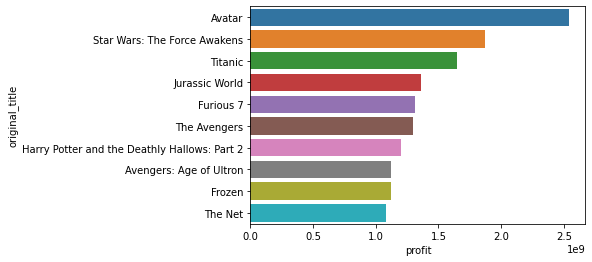

In [80]:
# Barplot showing the highest grossing movies

sns.barplot(x='profit', y=top10_profit.index, data=top10_profit);


The results show the highest grossing movies.


### Question 1a): Are the highest grossing movies popular?



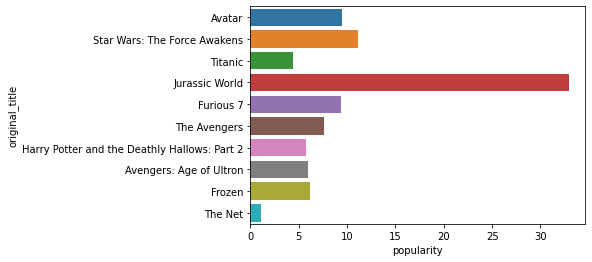

In [81]:
# Barplot showing the popularity of the highest grossing movies

sns.barplot(x='popularity', y=top10_profit.index, data=top10_profit);

The results show that the highest grossing movies are not as popular.

### Question 1b): What is the vote_average for the highest grossing movies?



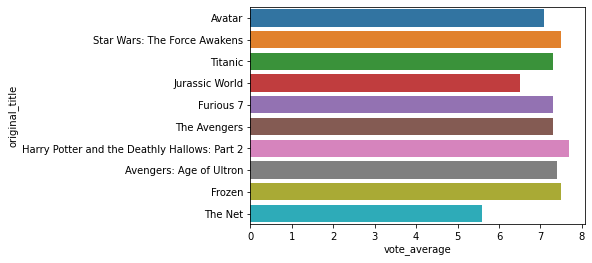

In [82]:
#Barplot showing the vote_average of the highest grossing movies

sns.barplot(x='vote_average', y=top10_profit.index, data=top10_profit);

The vote average for the highest grossing movies is between 5 and 8


### Question 2: Are the most popular movies also the highest grossing movies?


In [83]:
# Checking the most popular movies

top10_popular = imdb_data.nlargest(10,'popularity')[['original_title', 'popularity', 'profit','vote_average']].set_index('original_title')
top10_popular

,popularity,profit,vote_average
original_title,,,
Jurassic World,32.985763,1.363529e+09,6.5
Mad Max: Fury Road,28.419936,2.284364e+08,7.1
Interstellar,24.949134,4.567525e+08,8.0
Guardians of the Galaxy,14.311205,6.033124e+08,7.9
Insurgent,13.112507,1.852382e+08,6.3
Captain America: The Winter Soldier,12.971027,5.447666e+08,7.6
Star Wars,12.037933,7.643980e+08,7.9
John Wick,11.422751,5.873990e+07,7.0
Star Wars: The Force Awakens,11.173104,1.868178e+09,7.5


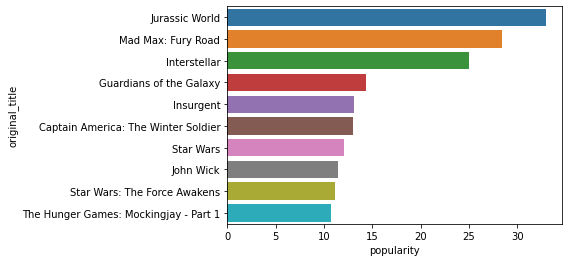

In [84]:
# Barplot showing the most popular movies

sns.barplot(x='popularity', y=top10_popular.index, data=top10_popular);

The most popular movies are not among the highest grossing movies except for Starwars: The Force Awakens and Jurassic World. Below is a barplot illustrating this.

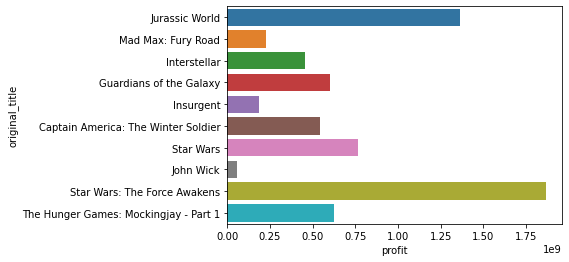

In [86]:
# Barplot the profit of the most popular movies

sns.barplot(x='profit', y=top10_popular.index, data=top10_popular);

The results show that popularity does not translate into profits. 

### Question 3: Does the average vote reflect the popularity of a movie?


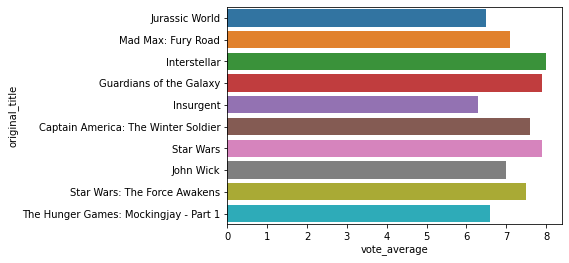

In [87]:
#Barplot showing the average votes of the most popular movies

sns.barplot(x='vote_average', y=top10_popular.index, data=top10_popular);

The results show that the average votes divided by 10 are fairly high for the most popular movies

### Question 4. Which movies have the longest runtime?


In [88]:
# Checking the top 10 longest movie runtime

top10_len = imdb_data.nlargest(10,'runtime')[['original_title','release_year', 'runtime','profit','popularity','vote_average']].set_index('original_title')
top10_len

,release_year,runtime,profit,popularity,vote_average
original_title,,,,,
Taken,2002,877.0,3.646723e+07,0.469332,6.8
Band of Brothers,2001,705.0,9.849515e+07,0.537593,8.0
Shoah,1985,566.0,2.006653e+07,0.147489,8.3
Life,2009,500.0,2.874344e+07,0.102223,7.0
Generation Kill,2008,470.0,2.626803e+07,0.336308,6.6
The Pillars of the Earth,2010,421.0,2.991634e+07,0.082894,7.3
The Blue Planet,2001,400.0,3.651292e+07,0.114027,6.9
Crystal Lake Memories: The Complete History of Friday the 13th,2013,400.0,2.733188e+07,0.141918,6.9
World Without End,2012,389.0,3.288341e+07,0.179240,6.1


Taken is the movie with the longest runtime as shown in the barplot below.

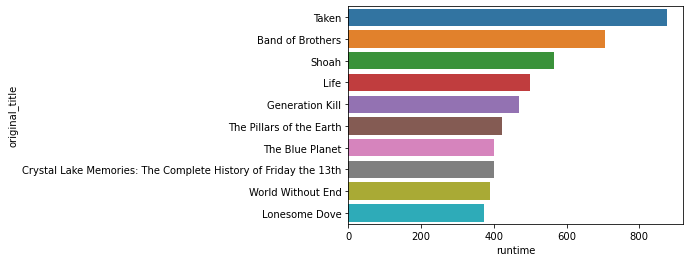

In [89]:
# Barplot showing the top 10 lengthy movies

sns.barplot(x='runtime', y=top10_len.index, data=top10_len);

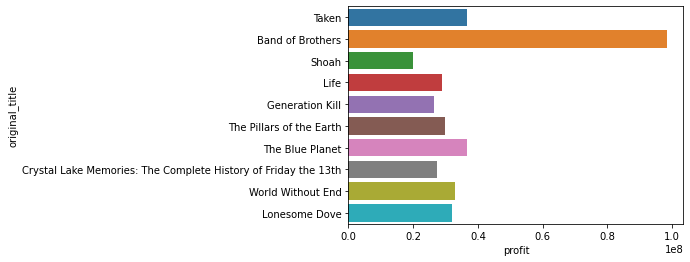

In [90]:
#Barplot showing the profit of the top 10 lengthy movies

sns.barplot(x='profit', y=top10_len.index, data=top10_len);

From the top 10, only the movie Band of Brothers appears to have generated much profit compared to the rest.

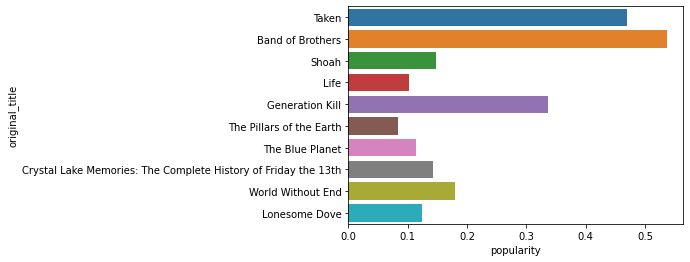

In [91]:
#Barplot showing the popularity of the top 10 lengthy movies

sns.barplot(x='popularity', y=top10_len.index, data=top10_len);

The barplot above shows that lengthy movies may not be as popular.

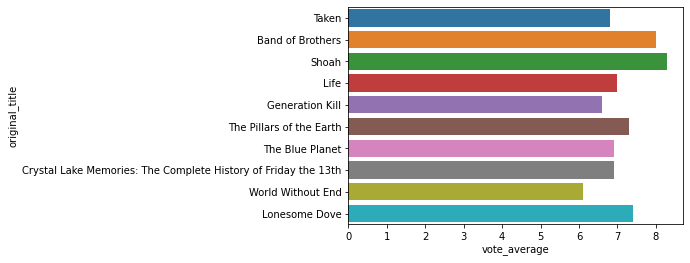

In [92]:
#Barplot showing the vote average of the top 10 lengthy movies

sns.barplot(x='vote_average', y=top10_len.index, data=top10_len);

Lengthy movies have a vote average of 7, which is fairly good.

### Question 5. Using the profit to budget ratio, which are the highest grossing movies?

In [93]:
# Profit to budget ratio. Code reference: https://www.kaggle.com/code/betizazualemu/tmdb-movies-analysis-ipynb

#First calculate the profit to budget ratio as follows

profit_to_budget_ratio = imdb_data.apply(lambda x: x.profit / x.budget, axis=1).sort_values(ascending=False).head(20)

profit_to_budget_proportion_movies = imdb_data[imdb_data.index.isin(profit_to_budget_ratio.index)]
profit_to_budget_proportion_movies = profit_to_budget_proportion_movies.reindex(profit_to_budget_ratio.index)


profit_to_budget_proportion_movies['profit_budget_ratio'] = profit_to_budget_ratio

profit_to_budget_proportion_movies[['original_title','release_year','budget', 'profit', 'profit_budget_ratio', 'popularity']].style.hide(axis='index')

original_title,release_year,budget,profit,profit_budget_ratio,popularity
"The Karate Kid, Part II",1986,113.000000,115103866.000000,1018618.283186,0.772494
Into the Night,1985,114.000000,6699886.000000,58770.929825,0.132713
From Prada to Nada,2011,93.000000,2499907.000000,26880.720430,0.463510
Paranormal Activity,2007,15000.000000,193340800.000000,12889.386667,1.120442
The Blair Witch Project,1999,25000.000000,247975000.000000,9919.000000,0.934621
"Love, Wedding, Marriage",2011,1.000000,1377.000000,1377.000000,0.520430
Eraserhead,1977,10000.000000,6990000.000000,699.000000,0.331417
Pink Flamingos,1972,12000.000000,5988000.000000,499.000000,0.412913
Super Size Me,2004,65000.000000,28510078.000000,438.616585,0.263897
The Gallows,2015,100000.000000,42564410.000000,425.644100,0.532205


Using the profit to budget ratio, Karate Kid, Part II is the highest grossing movie. This is totally different from the initial list of the highest grossing movies

### Question 6. Who are the top 10 directors in terms of the following:
          
####  a) Popularity?
####  b) Vote average?
####  c) Movies directed?


In [94]:
#TOP 10 Directors

top10_directors = imdb_data.nlargest(10,'popularity')[['director','original_title', 'release_year','popularity']].set_index('original_title')
top10_directors

,director,release_year,popularity
original_title,,,
Jurassic World,Colin Trevorrow,2015,32.985763
Mad Max: Fury Road,George Miller,2015,28.419936
Interstellar,Christopher Nolan,2014,24.949134
Guardians of the Galaxy,James Gunn,2014,14.311205
Insurgent,Robert Schwentke,2015,13.112507
Captain America: The Winter Soldier,Joe Russo|Anthony Russo,2014,12.971027
Star Wars,George Lucas,1977,12.037933
John Wick,Chad Stahelski|David Leitch,2014,11.422751
Star Wars: The Force Awakens,J.J. Abrams,2015,11.173104


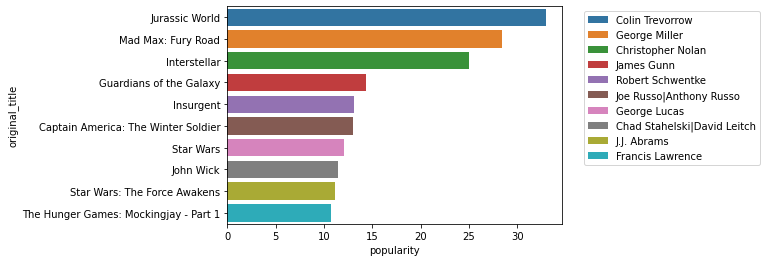

In [95]:
#Barplot showing the top 10 Directors in terms of popularity

sns.barplot(x='popularity', y=top10_directors.index, data=top10_directors, hue='director', dodge=False);

plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

Colin Trevorrow is the most popular director popularity wise.

In [96]:
#code reference: https://www.youtube.com/watch?v=Asm2_qgBK48&t=161s

#Top 10 directors in terms of vote average

top10_directors_vote_avg = imdb_data.nlargest(10,'vote_average')[['original_title','director','release_year', 'vote_average']].set_index('original_title')
top10_directors_vote_avg

,director,release_year,vote_average
original_title,,,
Pink Floyd: Pulse,David Mallet,2006,8.7
The Art of Flight,Curt Morgan,2011,8.5
A Personal Journey with Martin Scorsese Through American Movies,Martin Scorsese|Michael Henry Wilson,1995,8.5
Queen - Rock Montreal,Saul Swimmer,1981,8.5
The Jinx: The Life and Deaths of Robert Durst,Andrew Jarecki,2015,8.4
The Shawshank Redemption,Frank Darabont,1994,8.4
Stop Making Sense,Jonathan Demme,1984,8.4
One Direction: Where We Are - The Concert,Paul Dugdale,2014,8.3
Iron Maiden: Flight 666,Sam Dunn|Scot McFadyen,2009,8.3


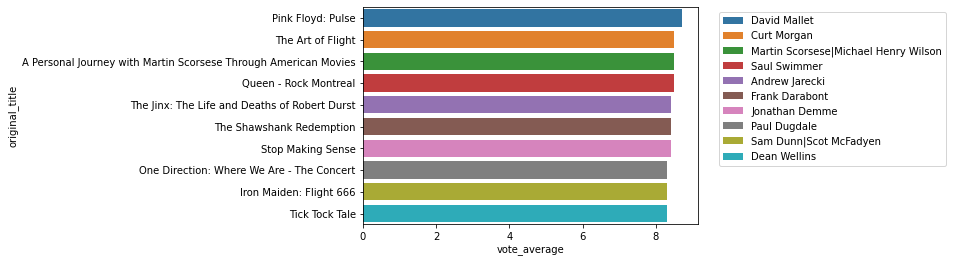

In [97]:
#Barplot showing the top 10 directors in terms of vote average

sns.barplot(x='vote_average', y=top10_directors_vote_avg.index, data=top10_directors_vote_avg, hue='director', dodge=False);

plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

In terms of vote average, David Mallet tops the list.

In [98]:
#Top 10 directors in terms of number of movies directed

director_movies_count = imdb_data.groupby('director')['original_title'].agg('count').reset_index().sort_values('original_title', ascending=False)

director_movies_count.head(10)

,director,original_title
4031,Woody Allen,35
704,Clint Eastwood,34
3713,Steven Spielberg,27
2546,Martin Scorsese,23
3241,Ridley Scott,22
1888,Joel Schumacher,20
3374,Ron Howard,19
458,Brian De Palma,18
3712,Steven Soderbergh,18
3583,Sidney Lumet,17


Woody Allen has the highest number of movies directed, with Clint Eastwood being a close second.


<a id='conclusions'></a>
## Conclusions


1. The highest grossing movies are not necessarily the top most popular movies as reflected in the results. their vote avearge however remains fairly the same that is between 5/10 and 9/10.

2. The top most lengthy movies are not as popular or do they yield as much profit, their average vote out of 10 remain fairly the same as the highest grossing movies and the most popular movies.

3. The budget to profit ratio shows a different picture in that the profitability of a movie is based on the proportion of the budget to its profit. It the results showed that movies that where profitable between 1960 and 2015 were not the highest grssoign movies. This can be attributed the fact that big budget movies will yield the most revenue hpwever they may not be as profitable. The vote average for these movies was above 8/10.

4. Woody Allen has directed 35 movies between 1960 and 2015 with Clint Eastwood a close second, Colin Trevorrow directed the most popular movie in the data given and David mallet directed the movie with the highest average vote.

5. It can be deduced that popularity does not necessarily translate into profit or yielding high profit. 

### Limitations

1. The dataset had a massive amount of zero values for the revenue and budget variables which had to be replaced with yearly means thus not reflecting the true profit values for most movies.

2. The dataset is outdated as it does not factor in the easy of access to movies through streaming services (Netflis, Amazom Prime, Disney Plus, e.t.c) and illegal downlaods which affect the profit of movies.